# **Clase 2: Metodología y Calidad del Dato - Caso E-commerce Real**

In [6]:
# Importamos librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
# Cargamos el dataset
df = pd.read_csv("/content/OnlineRetail.csv", encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## DIAGNÓSTICO DE CALIDAD - 5 PROBLEMAS EMPRESARIALES CRÍTICOS
- Problema 1: Clientes anónimos

In [7]:
clientes_anonimos = df['CustomerID'].isnull().sum()
porcentaje_anonimos = (clientes_anonimos / len(df)) * 100
print(f"\n1. CLIENTES ANÓNIMOS: {clientes_anonimos:,} transacciones ({porcentaje_anonimos:.1f}%)")
print("   → Impacto: No podemos hacer marketing dirigido")


1. CLIENTES ANÓNIMOS: 135,080 transacciones (24.9%)
   → Impacto: No podemos hacer marketing dirigido


Text(0.5, 1.0, 'Proporción de Clientes Identificados')

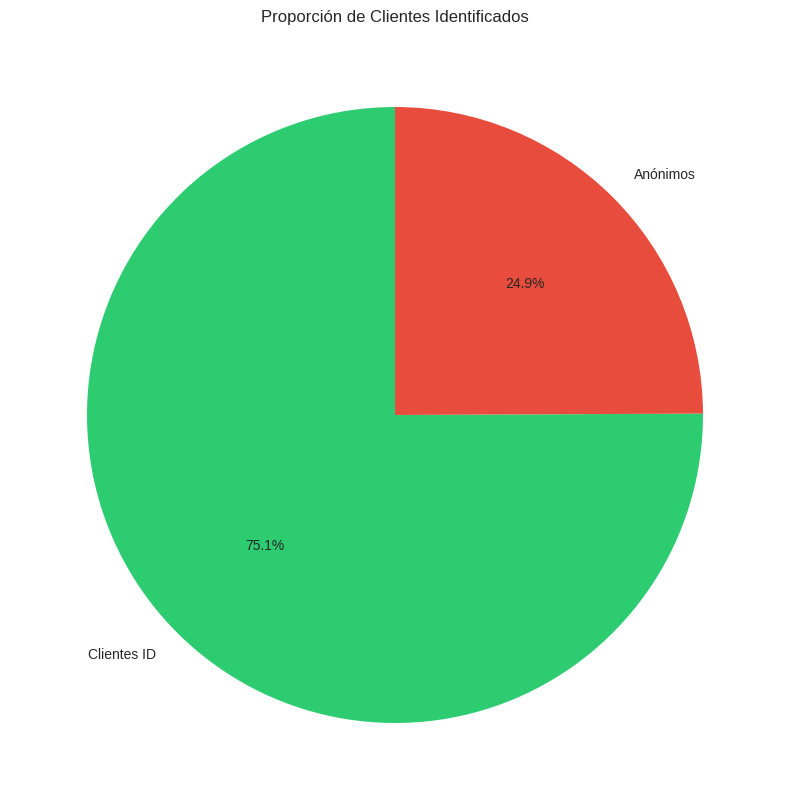

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(14, 10))
labels = ['Clientes ID', 'Anónimos']
sizes = [len(df) - clientes_anonimos, clientes_anonimos]
colors = ['#2ecc71', '#e74c3c']
axes.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes.set_title('Proporción de Clientes Identificados', fontsize=12)

- Problema 2: Devoluciones sin procesar

In [9]:
devoluciones = len(df[df['Quantity'] < 0])
porcentaje_devoluciones = (devoluciones / len(df)) * 100
print(f"\n2. DEVOLUCIONES SIN PROCESAR: {devoluciones:,} transacciones negativas ({porcentaje_devoluciones:.1f}%)")
print("→ Impacto: Sobrestimamos ventas reales")


2. DEVOLUCIONES SIN PROCESAR: 10,624 transacciones negativas (2.0%)
→ Impacto: Sobrestimamos ventas reales


- Problema 3: Outliers de precio

In [10]:
precio_max = df['UnitPrice'].max()
transacciones_caras = len(df[df['UnitPrice'] > 1000])
print(f"\n3. PRECIOS OUTLIERS: Máximo £{precio_max:,.2f}")
print(f"   → {transacciones_caras} transacciones > £1,000")
print("   → ¿Son errores o productos especiales?")


3. PRECIOS OUTLIERS: Máximo £38,970.00
   → 120 transacciones > £1,000
   → ¿Son errores o productos especiales?


<Axes: ylabel='UnitPrice'>

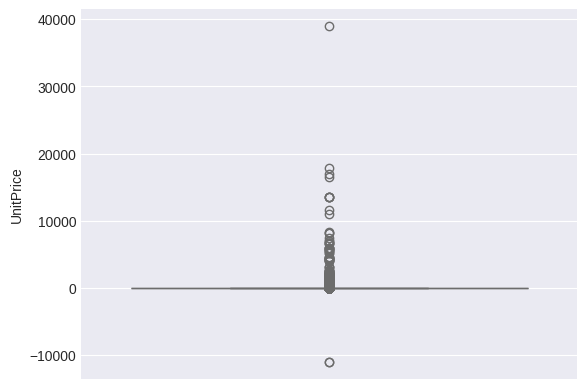

In [11]:
sns.boxplot(df['UnitPrice'])

- Problema 4: Cantidades extremas o extrañas de inventario
---
Posibles errores de inventario

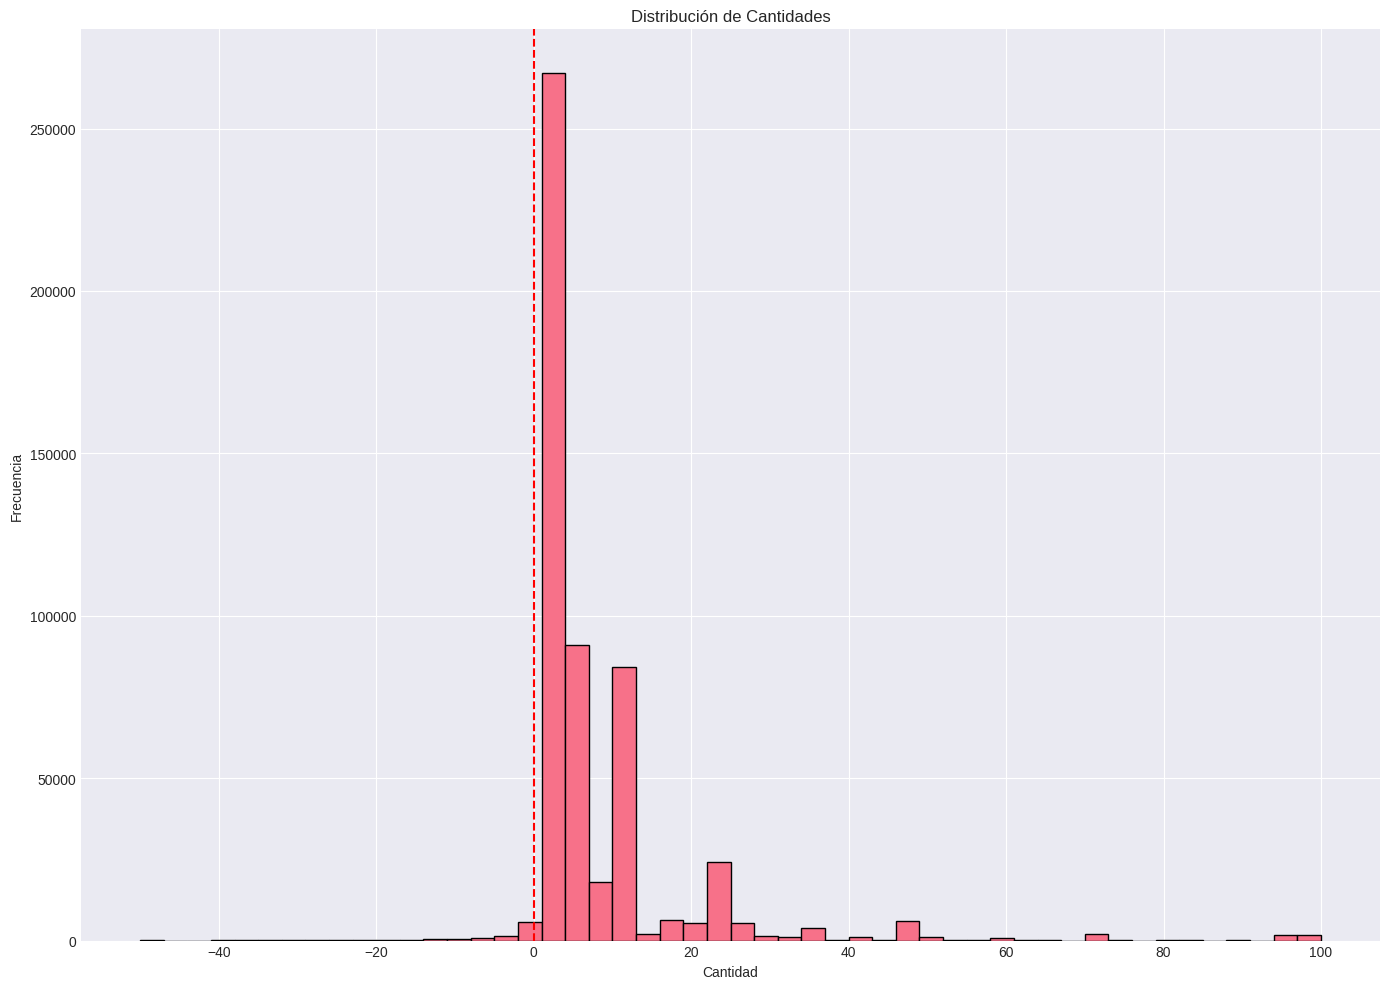

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(14, 10))
axes.hist(df['Quantity'], bins=50, range=(-50, 100), edgecolor='black')
axes.set_title('Distribución de Cantidades', fontsize=12)
axes.set_xlabel('Cantidad')
axes.set_ylabel('Frecuencia')
axes.axvline(0, color='red', linestyle='--', label='Línea cero')
plt.tight_layout()
plt.show()

- Problema 5: Datos inconsistentes

In [13]:
inconsistencias = df['Description'].str.contains(r'[?¿¡!*]', na=False).sum()
print(f"\n5. INCONSISTENCIAS: {inconsistencias:,} descripciones con caracteres extraños")
print("   → Problemas de calidad de entrada de datos")


5. INCONSISTENCIAS: 150 descripciones con caracteres extraños
   → Problemas de calidad de entrada de datos


## 📋 **ESCENARIO: Eres el Director de Analytics de una retail online**
### El CEO te pregunta: ¿Cuál fue nuestro ingreso total el último trimestre?

In [21]:
# Calcular ingresos con y sin limpieza
df['Ingreso'] = df['Quantity'] * df['UnitPrice']

# Ingreso bruto (con errores)
ingreso_bruto = df['Ingreso'].sum()
print(f"\n1. INGRESO BRUTO (con errores): £{ingreso_bruto:,.2f}")


1. INGRESO BRUTO (con errores): £9,747,747.93


In [25]:
# Ingreso corregido
df['clean_Quantity'] = df['Quantity'].apply(lambda x: 0 if (x < 0 or x>100) else x)
df['clean_UnitPrice'] = df['UnitPrice'].apply(lambda x: 0 if (x > 1000 or x<0) else x)
df['ingreso_corregido'] = df['clean_Quantity'] * df['clean_UnitPrice']
ingreso_corregido = df['ingreso_corregido'].sum()
print(f"\n2. INGRESO CORREGIDO: £{ingreso_corregido:,.2f}")
diferencia = ingreso_bruto - ingreso_corregido

print(f"\n3. INGRESO CORREGIDO: £{ingreso_corregido:,.2f}")
print(f"4. DIFERENCIA: £{diferencia:,.2f} ({abs(diferencia/ingreso_bruto*100):.1f}% del total)")

print("\n🤔 DECISIÓN DE NEGOCIO:")
print(f"   Opción A: Reportar £{ingreso_bruto:,.2f} (riesgo: sobrestimar)")
print(f"   Opción B: Reportar £{ingreso_corregido:,.2f} (riesgo: subestimar)")
print(f"   Opción C: Reportar rango: £{ingreso_corregido:,.2f} - £{ingreso_bruto:,.2f}")


2. INGRESO CORREGIDO: £8,593,100.66

3. INGRESO CORREGIDO: £8,593,100.66
4. DIFERENCIA: £1,154,647.27 (11.8% del total)

🤔 DECISIÓN DE NEGOCIO:
   Opción A: Reportar £9,747,747.93 (riesgo: sobrestimar)
   Opción B: Reportar £8,593,100.66 (riesgo: subestimar)
   Opción C: Reportar rango: £8,593,100.66 - £9,747,747.93


## 📚 APRENDIZAJES CLAVE
1. GIGO es real: datos sucios = decisiones erróneas
2. Cada error tiene impacto económico medible
3. La limpieza no es técnica, es de negocio
4. Mejor un dato aproximadamente correcto que exactamente erróneo